In [1]:
import numpy as np
import pandas as pd
import os 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
dir_list=sorted(os.listdir("/home/ritam/ontology_hardness/dataset"))
print(dir_list)

['.~lock.file_58.csv#', '.~lock.file_59.csv#', 'file_1.csv', 'file_10.csv', 'file_11.csv', 'file_12.csv', 'file_13.csv', 'file_14.csv', 'file_15.csv', 'file_16.csv', 'file_17.csv', 'file_18.csv', 'file_19.csv', 'file_2.csv', 'file_20.csv', 'file_21.csv', 'file_22.csv', 'file_23.csv', 'file_24.csv', 'file_25.csv', 'file_26.csv', 'file_27.csv', 'file_28.csv', 'file_29.csv', 'file_3.csv', 'file_30.csv', 'file_31.csv', 'file_32.csv', 'file_33.csv', 'file_34.csv', 'file_35.csv', 'file_36.csv', 'file_37.csv', 'file_38.csv', 'file_39.csv', 'file_4.csv', 'file_40.csv', 'file_41.csv', 'file_42.csv', 'file_43.csv', 'file_44.csv', 'file_45.csv', 'file_46.csv', 'file_47.csv', 'file_48.csv', 'file_49.csv', 'file_5.csv', 'file_50.csv', 'file_51.csv', 'file_52.csv', 'file_53.csv', 'file_54.csv', 'file_55.csv', 'file_56.csv', 'file_57.csv', 'file_58.csv', 'file_59.csv', 'file_6.csv', 'file_7.csv', 'file_8.csv', 'file_9.csv']


In [3]:
l=0
final_df=pd.DataFrame(columns=['size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])

full_dataframe = pd.DataFrame(columns=['file','size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])


for i in range(len(dir_list)):
    if dir_list[i][0]=='f':
        x=dir_list[i]
        #print(x)
        path="/home/ritam/ontology_hardness/dataset/"+x
        z=pd.read_csv(path)
        #print(z.columns)
        z_drop=z.drop(['file'],axis=1)
        #print(z_drop)
        final_df=pd.concat([final_df,z_drop])
        
        full_dataframe=pd.concat([full_dataframe,z])
        #print(final_df)
        #if l==1:
        #    break
        #l=l+1

print("total ontologies with time and memrory")
print(full_dataframe.shape) # contains the file name and all other
print(final_df.shape) #donot contains the file name and all other

total ontologies with time and memrory
(16434, 8)
(16434, 7)


In [4]:
#print(final_df)
final_np=np.array(final_df)
#print(final_np)
scaler = MinMaxScaler()
scaler.fit(final_df)
final_df_scaled=scaler.transform(final_df)
#print(final_df_scaled)
df_MinMax = pd.DataFrame(data=final_df_scaled, columns=['size_kb', 'consistency_time_milsecs', 'consistency_size_kb',
       'realisation_time_milsecs', 'realisation_size_kb',
       'classification_time_milsecs', 'classification_size_kb'])
df_MinMax

,size_kb,consistency_time_milsecs,consistency_size_kb,realisation_time_milsecs,realisation_size_kb,classification_time_milsecs,classification_size_kb
0,0.000049,6.481351e-07,0.000013,5.092071e-07,0.000017,5.091955e-07,0.000015
1,0.000248,1.759224e-06,0.000026,2.684910e-06,0.000060,2.083073e-06,0.000057
2,0.000070,1.388861e-06,0.000041,1.203580e-06,0.000047,1.342425e-06,0.000046
3,0.000038,6.018397e-07,0.000009,7.406649e-07,0.000022,7.869386e-07,0.000023
4,0.000051,7.870212e-07,0.000012,7.869564e-07,0.000020,7.406481e-07,0.000021
...,...,...,...,...,...,...,...
16429,0.000083,5.092490e-07,0.000008,6.017902e-07,0.000016,6.943576e-07,0.000013
16430,0.000010,4.629536e-07,0.000006,3.703324e-07,0.000004,2.314525e-07,0.000003
16431,0.000049,7.870212e-07,0.000013,6.480818e-07,0.000016,6.017765e-07,0.000015
16432,0.000049,7.870212e-07,0.000013,6.480818e-07,0.000017,5.554860e-07,0.000015


In [5]:
#print(df_MinMax)
#consistency_size_kb
#t=np.max(final_df[0:10000]["consistency_size_kb"])
#print(t)
#d=np.max(final_df[0:10000]["consistency_time_milsecs"])
#print(d)
#16433

partial_dataframe=full_dataframe.iloc[0:16433,:]  # contains non scaled values
print(partial_dataframe.shape)
t=df_MinMax.head(16433)  # contains scaled values
print(t.shape)

#t=df_MinMax
#print(final_df["consistency_time_milsecs"])
#print(t)
#plt.scatter(t["consistency_time_milsecs"],t["consistency_size_kb"],c='black')
#plt.xlabel('time_in_milisecs')
#plt.ylabel('size_in_kb')
#plt.show()
#print(np.max(final_df[2065:2070])[])
#print(final_df[final_df["consistency_time_milsecs"]>=1000])

(16433, 8)
(16433, 7)


KMeans(algorithm='elkan', max_iter=400, n_clusters=3, random_state=0)
[0 0 0 ... 0 0 0]
<class 'pandas.core.frame.DataFrame'>


<ipython-input-6-b727dbec3ee3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cluster']=y_predicted


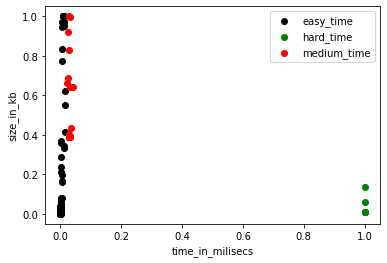

In [6]:
# cluster based on time  into easy, medium and hard
#t_np=np.array(t)
#print(t_np)
km = KMeans(n_clusters=3,random_state=0,algorithm="elkan",max_iter=400)
print(km)
#y_predicted=km.fit_predict(t[["consistency_time_milsecs","consistency_size_kb"]])
y_predicted=km.fit_predict(t[["consistency_time_milsecs"]])
print(y_predicted)
print(type(t))
t['cluster']=y_predicted
#print(t)
t1=t[t['cluster']==0]
t2=t[t['cluster']==1]
t3=t[t['cluster']==2]

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black', label='easy_time')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green',label='hard_time')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red',label='medium_time')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='.',label='centroid')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.legend()
plt.show()


In [7]:
label_col=[]
for i in range((y_predicted.shape[0])):
    if y_predicted[i]==0:
        label_col.append('easy')
    elif y_predicted[i]==1:
        label_col.append('hard')
    else:
        label_col.append('medium')
        
partial_dataframe['label_time']=label_col
#full_dataframe_hard_medium=partial_dataframe[partial_dataframe['label']!='easy']
#full_dataframe_hard_medium=full_dataframe_hard_medium[full_dataframe_hard_medium['label']!='hard']
#full_dataframe_hard_medium

<ipython-input-7-eb25419cee92>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_dataframe['label_time']=label_col


In [8]:
# collect the easy ones based on time

df_easy=partial_dataframe[partial_dataframe['label_time']=='easy']
df_medium=partial_dataframe[partial_dataframe['label_time']=='medium']
df_hard=partial_dataframe[partial_dataframe['label_time']=='hard']
print(df_easy['consistency_time_milsecs'].max(),df_easy['consistency_time_milsecs'].min())
print(df_easy.shape)
print(df_medium['consistency_time_milsecs'].max(),df_medium['consistency_time_milsecs'].min())
print(df_medium.shape)
print(df_hard['consistency_time_milsecs'].max(),df_hard['consistency_time_milsecs'].min())
print(df_hard.shape)


308466 13
(16371, 9)
898338 500321
(56, 9)
21600449 21600051
(6, 9)


In [33]:
#print(df_MinMax)
#consistency_size_kb
#t=np.max(final_df[0:10000]["consistency_size_kb"])
#print(t)
#d=np.max(final_df[0:10000]["consistency_time_milsecs"])
#print(d)
#16433

partial_dataframe=full_dataframe.iloc[0:16433,:]  # contains non scaled values
print(partial_dataframe.shape)
t=df_MinMax.head(16433)  # contains scaled values
print(t.shape)

#t=df_MinMax
#print(final_df["consistency_time_milsecs"])
#print(t)
#plt.scatter(t["consistency_time_milsecs"],t["consistency_size_kb"],c='black')
#plt.xlabel('time_in_milisecs')
#plt.ylabel('size_in_kb')
#plt.show()
#print(np.max(final_df[2065:2070])[])
#print(final_df[final_df["consistency_time_milsecs"]>=1000])

(16433, 8)
(16433, 7)


[0 0 0 ... 0 0 0]
<class 'pandas.core.frame.DataFrame'>


/home/ritam/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_birch.py:647: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (3). Decrease the threshold.
  warnings.warn(
<ipython-input-36-6e11459c8e07>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cluster']=y_predicted


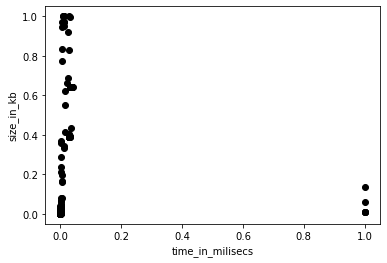

In [36]:
# cluster based on time  into easy, medium and hard
#t_np=np.array(t)
#print(t_np)
from sklearn.cluster import Birch

brc = Birch(branching_factor=50, n_clusters=3, threshold=10)

y_predicted=brc.fit_predict(t[["consistency_time_milsecs"]])
print(y_predicted)
print(type(t))
t['cluster']=y_predicted
#print(t)
t1=t[t['cluster']==0]
t2=t[t['cluster']==1]
t3=t[t['cluster']==2]

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='.',label='centroid')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.show()


In [11]:
label_col=[]
for i in range((y_predicted.shape[0])):
    if y_predicted[i]==0:
        label_col.append('easy')
    elif y_predicted[i]==1:
        label_col.append('hard')
    else:
        label_col.append('medium')
        
partial_dataframe['label_time']=label_col
#full_dataframe_hard_medium=partial_dataframe[partial_dataframe['label']!='easy']
#full_dataframe_hard_medium=full_dataframe_hard_medium[full_dataframe_hard_medium['label']!='hard']
#full_dataframe_hard_medium

<ipython-input-11-eb25419cee92>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_dataframe['label_time']=label_col


In [12]:
# collect the easy ones based on time

df_easy=partial_dataframe[partial_dataframe['label_time']=='easy']
df_medium=partial_dataframe[partial_dataframe['label_time']=='medium']
df_hard=partial_dataframe[partial_dataframe['label_time']=='hard']
print(df_easy['consistency_time_milsecs'].max(),df_easy['consistency_time_milsecs'].min())
print(df_easy.shape)
print(df_medium['consistency_time_milsecs'].max(),df_medium['consistency_time_milsecs'].min())
print(df_medium.shape)
print(df_hard['consistency_time_milsecs'].max(),df_hard['consistency_time_milsecs'].min())
print(df_hard.shape)


21600449 13
(16433, 9)
nan nan
(0, 9)
nan nan
(0, 9)


In [15]:
#print(df_MinMax)
#consistency_size_kb
#t=np.max(final_df[0:10000]["consistency_size_kb"])
#print(t)
#d=np.max(final_df[0:10000]["consistency_time_milsecs"])
#print(d)
#16433

partial_dataframe=full_dataframe.iloc[0:16433,:]  # contains non scaled values
print(partial_dataframe.shape)
t=df_MinMax.head(16433)  # contains scaled values
print(t.shape)

#t=df_MinMax
#print(final_df["consistency_time_milsecs"])
#print(t)
#plt.scatter(t["consistency_time_milsecs"],t["consistency_size_kb"],c='black')
#plt.xlabel('time_in_milisecs')
#plt.ylabel('size_in_kb')
#plt.show()
#print(np.max(final_df[2065:2070])[])
#print(final_df[final_df["consistency_time_milsecs"]>=1000])

(16433, 8)
(16433, 7)


[0 0 0 ... 0 0 0] 6
<class 'pandas.core.frame.DataFrame'>


<ipython-input-16-9a54b1b4c56f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cluster']=y_predicted


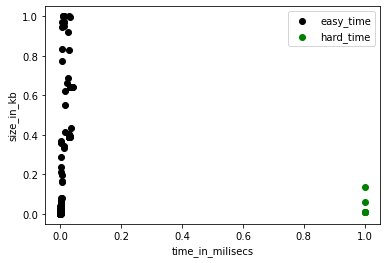

In [16]:
from sklearn.cluster import DBSCAN # density based clustering
# cluster based on time  into easy, medium and hard
#t_np=np.array(t)
#print(t_np)

brc = DBSCAN(eps = 0.02, min_samples = 5)
y_predicted=brc.fit_predict(t[["consistency_time_milsecs"]])
print(y_predicted, np.sum(y_predicted))
print(type(t))
t['cluster']=y_predicted
#print(t)

t1=t[t['cluster']==0]
t2=t[t['cluster']==1]
t3=t[t['cluster']==2]

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black',label='easy_time')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green',label='hard_time')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='.',label='centroid')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.legend()
plt.show()


In [17]:
label_col=[]
for i in range((y_predicted.shape[0])):
    if y_predicted[i]==0:
        label_col.append('easy')
    elif y_predicted[i]==1:
        label_col.append('hard')
    else:
        label_col.append('medium')
        
partial_dataframe['label_time']=label_col
#full_dataframe_hard_medium=partial_dataframe[partial_dataframe['label']!='easy']
#full_dataframe_hard_medium=full_dataframe_hard_medium[full_dataframe_hard_medium['label']!='hard']
#full_dataframe_hard_medium

<ipython-input-17-eb25419cee92>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_dataframe['label_time']=label_col


In [18]:
# collect the easy ones based on time

df_easy=partial_dataframe[partial_dataframe['label_time']=='easy']
df_medium=partial_dataframe[partial_dataframe['label_time']=='medium']
df_hard=partial_dataframe[partial_dataframe['label_time']=='hard']
print(df_easy['consistency_time_milsecs'].max(),df_easy['consistency_time_milsecs'].min())
print(df_easy.shape)
print(df_medium['consistency_time_milsecs'].max(),df_medium['consistency_time_milsecs'].min())
print(df_medium.shape)
print(df_hard['consistency_time_milsecs'].max(),df_hard['consistency_time_milsecs'].min())
print(df_hard.shape)


898338 13
(16427, 9)
nan nan
(0, 9)
21600449 21600051
(6, 9)


In [29]:
#print(df_MinMax)
#consistency_size_kb
#t=np.max(final_df[0:10000]["consistency_size_kb"])
#print(t)
#d=np.max(final_df[0:10000]["consistency_time_milsecs"])
#print(d)
#16433

partial_dataframe=full_dataframe.iloc[0:16433,:]  # contains non scaled values
print(partial_dataframe.shape)
t=df_MinMax.head(16433)  # contains scaled values
print(t.shape)

#t=df_MinMax
#print(final_df["consistency_time_milsecs"])
#print(t)
#plt.scatter(t["consistency_time_milsecs"],t["consistency_size_kb"],c='black')
#plt.xlabel('time_in_milisecs')
#plt.ylabel('size_in_kb')
#plt.show()
#print(np.max(final_df[2065:2070])[])
#print(final_df[final_df["consistency_time_milsecs"]>=1000])

(16433, 8)
(16433, 7)


[0 0 0 ... 0 0 0] 118
<class 'pandas.core.frame.DataFrame'>


<ipython-input-30-4ceca264e8f8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cluster']=y_predicted


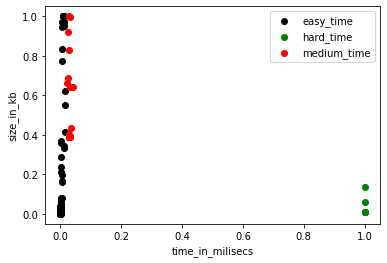

In [30]:
from sklearn.cluster import AgglomerativeClustering # hierachical based clustering
# cluster based on time  into easy, medium and hard
#t_np=np.array(t)
#print(t_np)

agm = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_predicted=agm.fit_predict(t[["consistency_time_milsecs"]])
print(y_predicted, np.sum(y_predicted))
print(type(t))
t['cluster']=y_predicted
#print(t)

t1=t[t['cluster']==0]
t2=t[t['cluster']==1]
t3=t[t['cluster']==2]

plt.scatter(t1["consistency_time_milsecs"],t1["consistency_size_kb"],c='black',label='easy_time')
plt.scatter(t2["consistency_time_milsecs"],t2["consistency_size_kb"],c='green',label='hard_time')
plt.scatter(t3["consistency_time_milsecs"],t3["consistency_size_kb"],c='red',label='medium_time')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='.',label='centroid')
plt.xlabel('time_in_milisecs')
plt.ylabel('size_in_kb')
plt.legend()
plt.show()


In [31]:
label_col=[]
for i in range((y_predicted.shape[0])):
    if y_predicted[i]==0:
        label_col.append('easy')
    elif y_predicted[i]==1:
        label_col.append('hard')
    else:
        label_col.append('medium')
        
partial_dataframe['label_time']=label_col
#full_dataframe_hard_medium=partial_dataframe[partial_dataframe['label']!='easy']
#full_dataframe_hard_medium=full_dataframe_hard_medium[full_dataframe_hard_medium['label']!='hard']
#full_dataframe_hard_medium

<ipython-input-31-eb25419cee92>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_dataframe['label_time']=label_col


In [32]:
# collect the easy ones based on time

df_easy=partial_dataframe[partial_dataframe['label_time']=='easy']
df_medium=partial_dataframe[partial_dataframe['label_time']=='medium']
df_hard=partial_dataframe[partial_dataframe['label_time']=='hard']
print(df_easy['consistency_time_milsecs'].max(),df_easy['consistency_time_milsecs'].min())
print(df_easy.shape)
print(df_medium['consistency_time_milsecs'].max(),df_medium['consistency_time_milsecs'].min())
print(df_medium.shape)
print(df_hard['consistency_time_milsecs'].max(),df_hard['consistency_time_milsecs'].min())
print(df_hard.shape)


308466 13
(16371, 9)
898338 500321
(56, 9)
21600449 21600051
(6, 9)
